# Análise da rede

In [2]:
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
caminho_dados = 'dados/processado/arestas.gml'
gf = nx.read_gml(caminho_dados)

## Análise de métricas de grafo

O número de arestas é extremamente alto

In [4]:
print("numero de nos", gf.number_of_nodes())
print("numero de arestas", gf.number_of_edges())
print("L_max", (gf.number_of_nodes() * (gf.number_of_nodes()-1)) / 2) 

numero de nos 1884
numero de arestas 640958
L_max 1773786.0


O grafo é extremamente conectado visto que o grau médio tem ordem duas vezes maior que o ln(N)

características de uma rede conectada:
* Única componente (porém nesse grafo tem duas componentes, uma com dois nós isolados e a gigante)
* Sem nós isolados ou clusteres

In [24]:
grau_medio = pd.DataFrame(gf.degree())[1].sum() / gf.number_of_nodes()
grau_medio_pesos = pd.DataFrame(gf.degree(weight='weight'))[1].sum() / gf.number_of_nodes()
print("grau médio", grau_medio)
print("grau médio com pesos", grau_medio_pesos)
print("ln(N)", math.log(gf.number_of_nodes(), math.e))

grau médio 680.4225053078557
grau médio com pesos 58816.168789808915
ln(N) 7.5411524551363085


Olhando a distribuíção dos graus a rede é do tipo small world

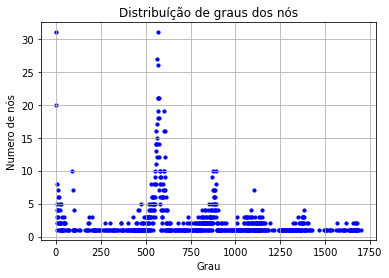

<Figure size 1500x750 with 0 Axes>

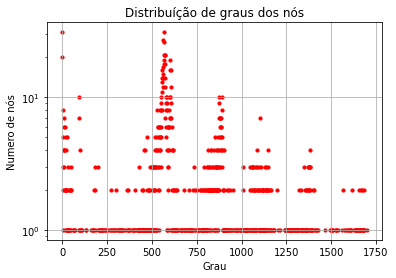

<Figure size 1500x750 with 0 Axes>

In [3]:
def degree_dist(G, color, weight='', log=False, name='distribuicaograu'):
    dicDegree = dict(G.degree(weight=weight))
    valores = sorted(set(dicDegree.values()))
    hist = [list(dicDegree.values()).count(x) for x in valores]

    plt.scatter(valores, hist, s=10, color=color)
    if(log == True):
        plt.yscale("log")
    plt.title("Distribuíção de graus dos nós")
    plt.xlabel('Grau')
    plt.ylabel('Numero de nós')
    plt.grid(visible=True)
    plt.savefig('img/{}.png'.format(name))
    plt.figure(figsize=[15, 7.5], dpi=100)
    
    plt.show()


degree_dist(gf, "blue", log=False, name='graus')
degree_dist(gf, "red", log=True, name='grausLog')

In [39]:
clusterizacao = nx.clustering(gf)

CLusterização média é bem alta

In [41]:
pd.Series(clusterizacao).mean()

0.8270292951134407

## Comunidades

In [14]:
from community import community_louvain
partition = community_louvain.best_partition(gf)

In [28]:
df_louvain = pd.DataFrame(partition, index=[0]).transpose()

In [29]:
df_louvain.groupby(0).size()

0
0      2
1    517
2    572
3     33
4    749
5      5
6      6
dtype: int64

In [30]:
nx.set_node_attributes(gf, partition, name='louvain_partition')

In [31]:
nx.write_gml(gf, 'dados/processado/arestas_louvain.gml')

## Análise das centralidades

Foram calculadas page rank e betweenes no gephi

In [3]:
caminho_dados = 'dados/processado/grafoDeputadosMetricas.gml'
gf = nx.read_gml(caminho_dados)

In [8]:
df_atr = pd.DataFrame.from_dict(dict(gf.nodes(data=True)), orient='index')
df_atr[['PageRank', 'BetweennessCentrality']] = df_atr[['PageRank', 'BetweennessCentrality']].astype(float)
df_atr

,graphics,nome,partidos,uf,Grau,ComponentID,ClusteringCoefficient,Numberoftriangles,PageRank,Eccentricity,ClosenessCentrality,HarmonicClosenessCentrality,BetweennessCentrality
73451.0,"{'x': 535.24084, 'y': 1410.0415, 'z': 0.0, 'w'...",FERNANDO ZUPPO,PDT,SP,2,0,0.0,0,0.000085,4.0,0.396,0.4134325713273239,0.084403
74357.0,"{'x': 643.605, 'y': 1561.3618, 'z': 0.0, 'w': ...",VANESSA GRAZZIOTIN,PCDOB,AM,902,0,0.72536304820217,294752,0.000779,3.0,0.6544885177453027,0.7385256069466594,3798.190821
73886.0,"{'x': 640.4641, 'y': 1560.4908, 'z': 0.0, 'w':...",ADÃO PRETTO,PT,RS,876,0,0.7505492498369211,287648,0.000742,3.0,0.6486206896551724,0.7316143895091262,2569.771341
73910.0,"{'x': 435.71143, 'y': 1604.5383, 'z': 0.0, 'w'...",PAULO PAIM,PT,RS,47,0,0.6632747456059205,717,0.000238,3.0,0.4972244250594766,0.5064681906787174,1954.440049
74307.0,"{'x': 578.6375, 'y': 1467.0203, 'z': 0.0, 'w':...",UBIRATAN AGUIAR,nan,nan,21,0,0.8714285714285714,183,0.000095,4.0,0.48806434872859367,0.49561403508771984,0.404076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219568.0,"{'x': 1112.6262, 'y': 1413.8684, 'z': 0.0, 'w'...",TIAGO ANDRINO,PSB,TO,246,0,0.9993695038991206,30116,0.000238,3.0,0.5211970074812967,0.5571504518872943,0.055080
219585.0,"{'x': 1137.8613, 'y': 1407.2032, 'z': 0.0, 'w'...",MARCO BRASIL,PP,PR,333,0,0.9917326965519737,54821,0.000294,4.0,0.5328611898016997,0.5797005139110403,1.433563
219592.0,"{'x': 1098.4615, 'y': 1347.1971, 'z': 0.0, 'w'...",LUCAS FOLLADOR,PSC,RO,399,0,0.9879976322716338,78448,0.000337,3.0,0.5447437011294527,0.598086124401914,3.437508
218879.0,"{'x': 1115.6119, 'y': 1510.5508, 'z': 0.0, 'w'...",NELHO BEZERRA,UNIÃO,CE,339,0,0.9915519016948561,56807,0.000298,3.0,0.5354397950469684,0.5821371610845296,1.907587


In [13]:

def centralidades_soma(coluna):
    part_metr = {}

    for i in range(len(df_atr)):
        metr = {'pr':0, 'bt':0}
        row = df_atr.iloc[i]
        metr['pr'] = row['PageRank']
        metr['bt'] = row['BetweennessCentrality']

        for part in row[coluna].split(','):
            if(part in part_metr):
                part_metr[part]['pr'] += metr['pr']
                part_metr[part]['bt'] += metr['bt']
            else:
                part_metr[part] = metr
    return part_metr

In [22]:
centralidades_uf = pd.DataFrame(centralidades_soma('uf')).transpose()
centralidades_part = pd.DataFrame(centralidades_soma('partidos')).transpose()
centralidades_uf.to_csv('dados/processado/centralidades_uf.csv')
centralidades_part.to_csv('dados/processado/centralidades_part.csv')

Percebe-se que a centralidade dos estados é de principalmente dos estados com o maior PIB, com exceção de Bahia e Pará

In [17]:
centralidades_uf.sort_values('pr', ascending=False)

,pr,bt
SP,0.136961,163267.660058
PA,0.099764,153972.748715
BA,0.099764,153972.748715
MG,0.096782,135130.575733
RJ,0.094713,97054.051975
RS,0.059804,93516.069852
PR,0.056353,86387.596650
PE,0.048495,64160.747344
CE,0.043125,57895.470002
MA,0.038041,33307.886732


Mantém o mesmo padrão para betweeness

In [ ]:
centralidades_uf.sort_values('bt', ascending=False)

,pr,bt
SP,0.136961,163267.660058
PA,0.099764,153972.748715
BA,0.099764,153972.748715
MG,0.096782,135130.575733
RJ,0.094713,97054.051975
RS,0.059804,93516.069852
PR,0.056353,86387.596650
PE,0.048495,64160.747344
CE,0.043125,57895.470002
GO,0.031666,39475.092508


In [20]:
centralidades_part.sort_values('pr', ascending=False)

,pr,bt
PFL,0.254975,333279.526303
PR,0.254975,333279.526303
PL,0.254975,333279.526303
PMDB,0.179924,291632.660109
PT,0.148824,261861.410505
PSDB,0.137427,170609.385279
PSC,0.117696,139074.360488
PSD,0.117696,139074.360488
PAN,0.117696,139074.360488
PP,0.113302,173685.617760


In [21]:
centralidades_part.sort_values('bt', ascending=False)

,pr,bt
PFL,0.254975,333279.526303
PR,0.254975,333279.526303
PL,0.254975,333279.526303
PMDB,0.179924,291632.660109
PT,0.148824,261861.410505
PP,0.113302,173685.617760
PSDB,0.137427,170609.385279
PPB,0.094648,139083.706855
PRB,0.094648,139083.706855
REPUBLIC,0.094648,139083.706855


In [23]:
len(centralidades_part)

54